In [313]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

df = pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Understand the data

In [315]:
# Examine the structure of the dataset
# Dimensions
df.shape

(891, 12)

In [316]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [317]:
# Check for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [318]:
# check data types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [319]:
# generate summary statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


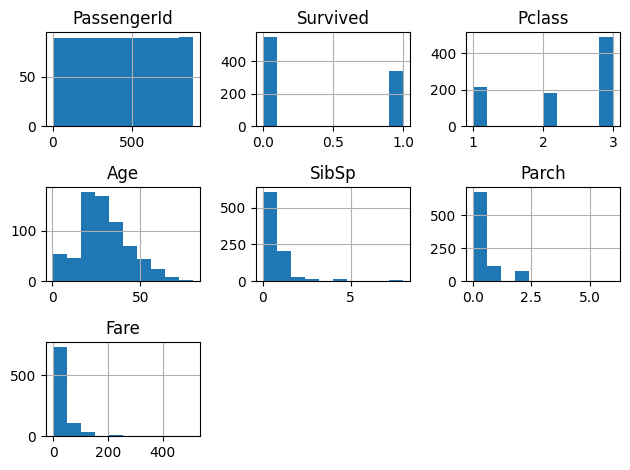

In [320]:
# get a feel for the data through basic visualisations
df.hist()
plt.tight_layout()

<Axes: >

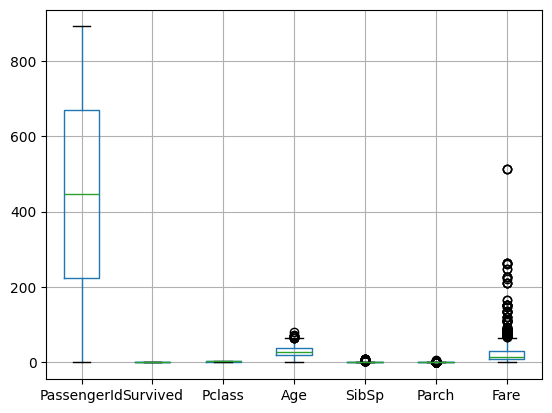

In [321]:
# Check if we have outliers
df.boxplot()

# Clean and Preprocess

A lot of variables are not relevant for the analysis so we will just drop these columns. Among them there are two columns with missing values:"Cabin" and" Embarked".

On the contrary, "Age" could be really relevant. We will use the median value of the Age column to fill missing values.

In [324]:
# handle missing values
# fill empty values in the "Age" column with the median value
df["Age"] = df["Age"].fillna(df["Age"].median())

In [325]:
# check unique entries for each variable
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [326]:
# we don't have inconsistencies so we can proceed with encoding
# for the "Sex" column we can use Label encoding
# we use mapping to do it
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [327]:
# we drop variables that we don't need or that are not numerical

features = df.drop(columns = ["PassengerId", "Name", "Ticket", "Cabin", "Embarked"])
features.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


# Explore Relationships

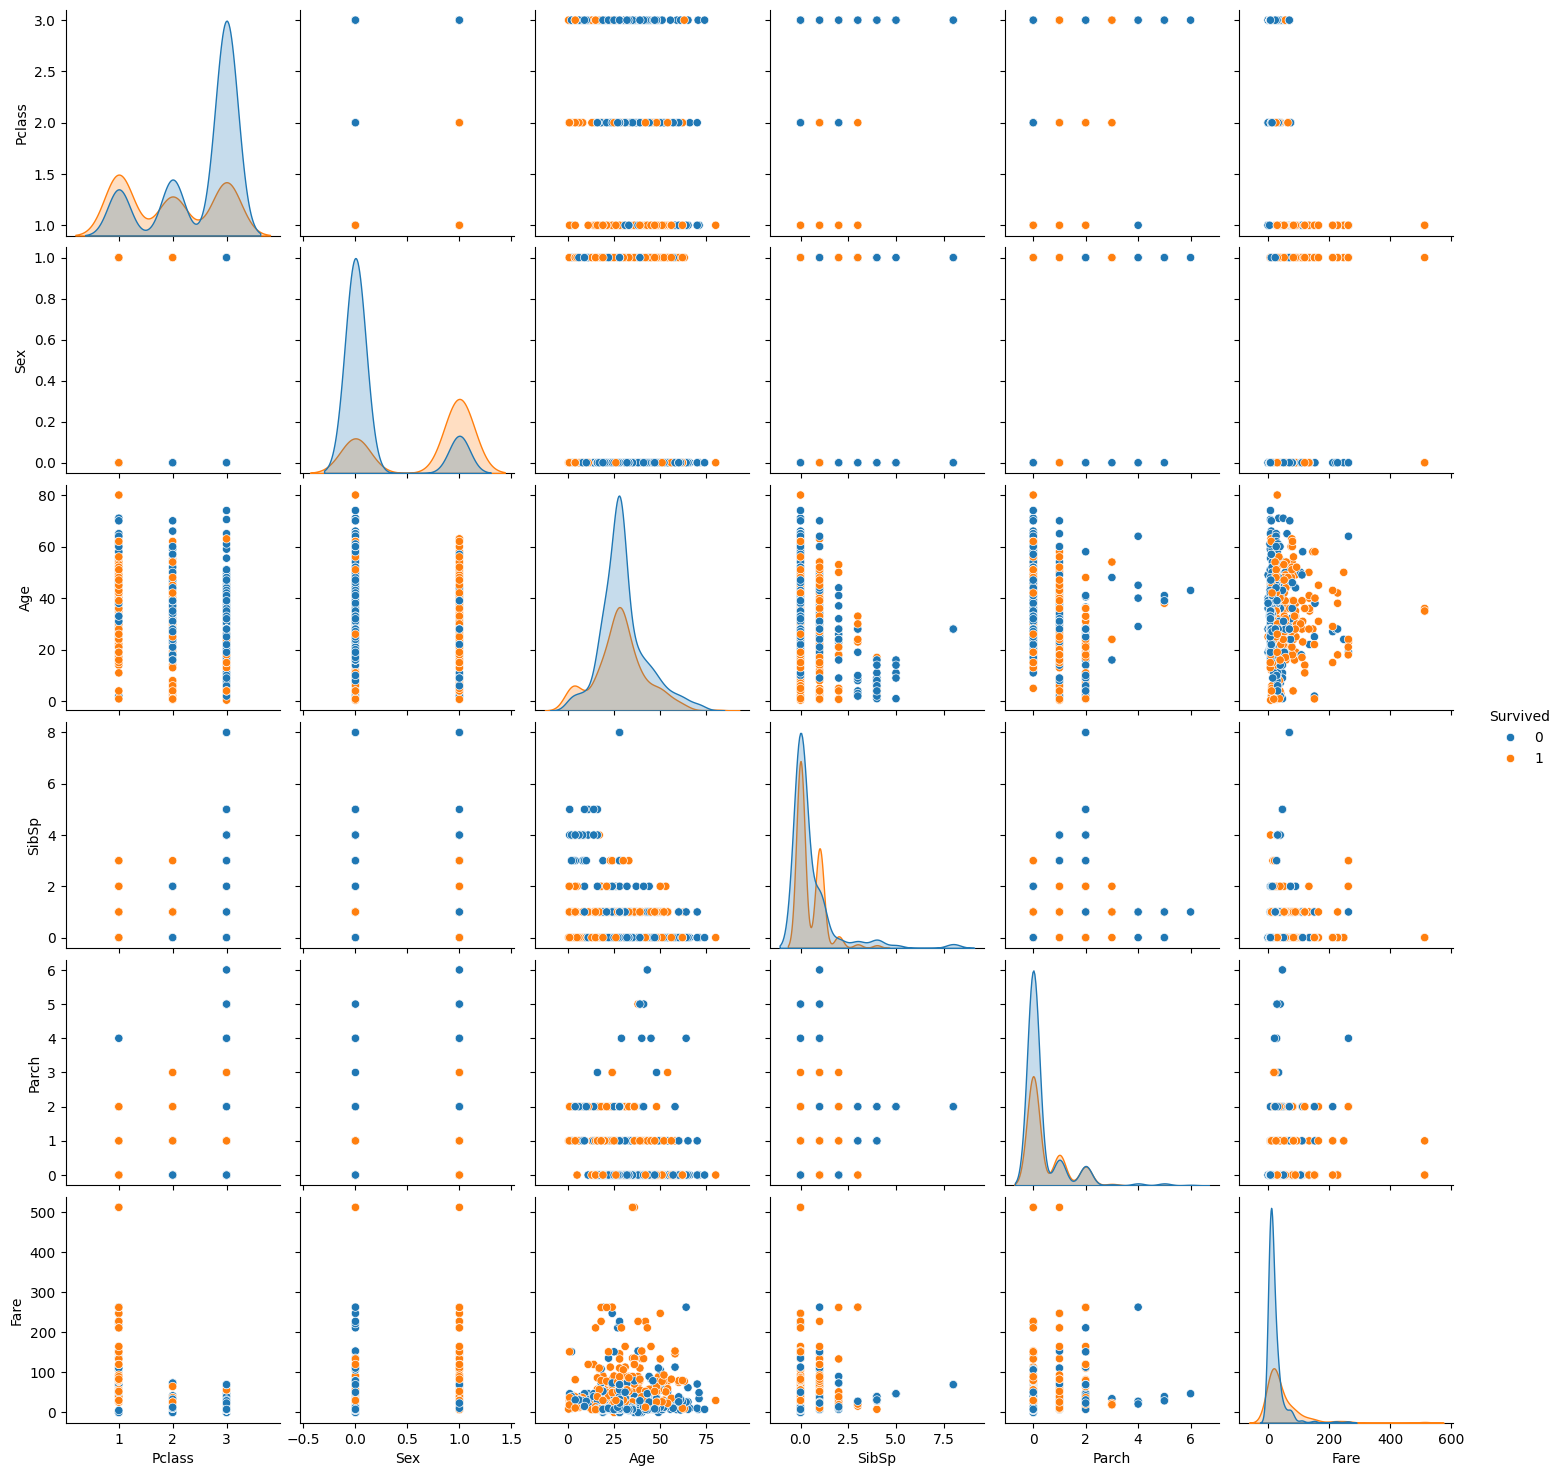

In [351]:
# create a pairplot
sns.pairplot(features, hue="Survived")
# we are interested in the first row (or the first column) where we see the correlation between our
# target variable (Survived) and the other variables

Text(0.5, 1.0, 'Heatmap')

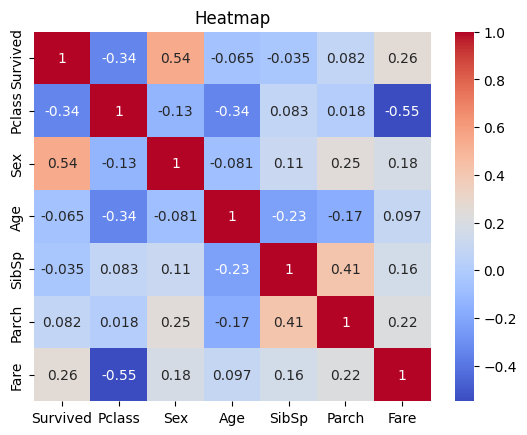

In [330]:
sns.heatmap(features.corr(), annot = True, cmap = "coolwarm")
plt.title("Heatmap")

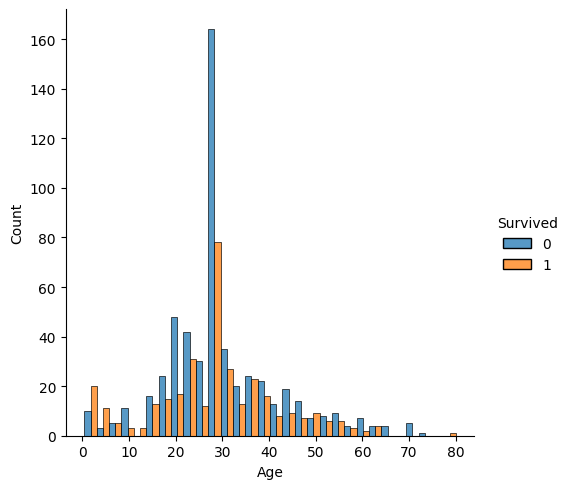

In [331]:
sns.displot(features, x="Age", hue="Survived", multiple="dodge")

# Answer the questions:
- What is the most important factor in determining survival of the Titanic incident?
- In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?
- "Women and children first". Was this the case?
- Add one other observation that you have noted in the dataset

Answers:
- There's a strong positive correlation between Sex and survival, meaning that females had more chances of survival. Sex appears to be the most important factor in determining survival
- There's a strong negative correlation between the Ticket class and survival (where a higher number in "Pclass" means a lower class, the 3rd) so actually the upper-class passengers were given preference on lifeboats according to data.
- We already seen that women had more chances of survival. About children, we can see that the chances of survival were higher for them than for other ages.
- There's a modest correlation between the cost of the ticket ("Fare") and the survival.